# Рябов Даниил Александрович 19-ИВТ-2

## Лабораторная работа №3

# 4 вариант

# 1) Изучить набор данных, создать описание набора данных на рускком языке.

## Набор данных содержит признаки:
### длинна чашелистика (в см)
### ширина чашелистика (в см)
### длинна лепестка (в см)
### ширина лепестка (в см)
### вид

In [2]:
%matplotlib inline

import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn as sk
from sklearn import preprocessing, neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import seaborn as sns

import numpy as np
warnings.simplefilter('ignore')
iris_df = pd.read_csv('iris.data.csv',header = None)
iris_df.columns = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# 2) Удалить дубикаты строк в наборе данных

In [3]:
iris_df.shape

(150, 5)

In [4]:
iris_df = iris_df.drop_duplicates()
iris_df.shape

(147, 5)

# 3) Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

Species
Iris-setosa        48
Iris-versicolor    50
Iris-virginica     49
Name: Species, dtype: int64

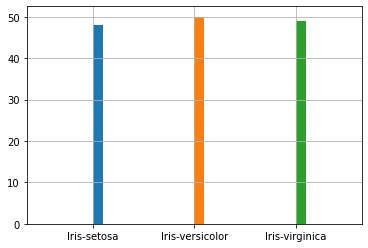

In [5]:
iris_df.groupby(['Species'])['Species'].hist()
iris_df.groupby(['Species'])['Species'].count()

# 4) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [6]:
numerical = [i for i in iris_df.columns if iris_df[i].dtype.name != 'object']
categorial = [i for i in iris_df.columns if iris_df[i].dtype.name == 'object']
print("Numerical",numerical)
print("Categorial",categorial)

Numerical ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
Categorial ['Species']


<AxesSubplot:>

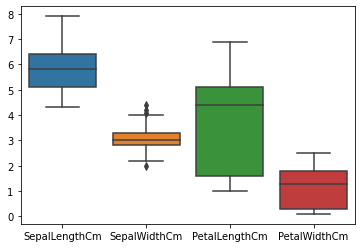

In [7]:
sns.boxplot(data=iris_df[numerical])

<AxesSubplot:>

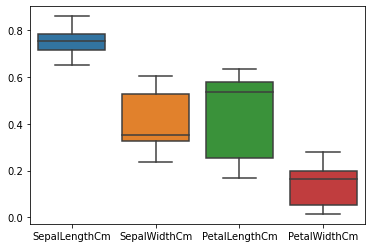

In [8]:
iris_df[numerical] = preprocessing.normalize(iris_df[numerical])
sns.boxplot(data=iris_df[numerical])

In [9]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,Iris-setosa
1,0.828133,0.507020,0.236609,0.033801,Iris-setosa
2,0.805333,0.548312,0.222752,0.034269,Iris-setosa
3,0.800030,0.539151,0.260879,0.034784,Iris-setosa
4,0.790965,0.569495,0.221470,0.031639,Iris-setosa
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,Iris-virginica
146,0.729654,0.289545,0.579090,0.220054,Iris-virginica
147,0.716539,0.330710,0.573231,0.220474,Iris-virginica
148,0.674671,0.369981,0.587616,0.250281,Iris-virginica


# 5) Выполните замену категориальных признаков

In [10]:
labelEncoder = LabelEncoder() 
iris_df['Species'] = labelEncoder.fit_transform(iris_df['Species'])
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0
...,...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699,2
146,0.729654,0.289545,0.579090,0.220054,2
147,0.716539,0.330710,0.573231,0.220474,2
148,0.674671,0.369981,0.587616,0.250281,2


# 6) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации)

<AxesSubplot:>

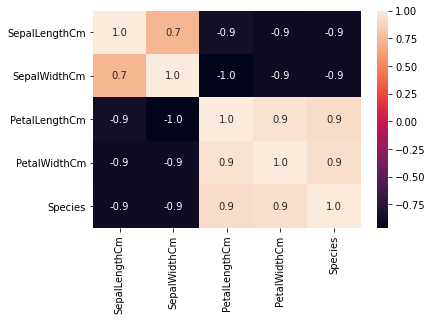

In [11]:
iris_corr_df = iris_df.corr()
sns.heatmap(iris_corr_df, annot=True, fmt='.1f')

# 7) Заполните пропущенные значения в данных

In [12]:
iris_df.notnull().count()

SepalLengthCm    147
SepalWidthCm     147
PetalLengthCm    147
PetalWidthCm     147
Species          147
dtype: int64

## Пропущеных значений нет

# 8) Решите поставленную задачу классификации в соответствии с заданием. 

### Классификатор К ближайших соседей

In [23]:
x = np.array(iris_df.drop('Species', axis=1))
y = np.array(iris_df['Species']) 
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)
print(X_train.shape)
print(X_test.shape)

(73, 4)
(74, 4)


In [14]:
knn = KNeighborsClassifier()

find = GridSearchCV(knn,{'n_neighbors':range(1,50)})
find.fit(X_train,y_train)

neighbor = find.best_estimator_.n_neighbors
best_score = find.best_score_

knn = KNeighborsClassifier(n_neighbors=neighbor)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print('Accuracy of KNN model: ',accuracy_score(y_test,predict))
print('Best score: ',best_score,'Neighbor: ',neighbor)


Accuracy of KNN model:  0.9459459459459459
Best score:  0.96 Neighbor:  1


### Логический классификатор(бинарное решающее дерево)

In [15]:
dtc = DecisionTreeClassifier()


dtc_grid = GridSearchCV(dtc, {'max_depth':list(range(1,100)),'max_features':list(range(1,5))})
dtc_grid.fit(X_train,y_train)

best_depth = dtc_grid.best_estimator_.max_depth
best_features = dtc_grid.best_estimator_.max_features

dtc = DecisionTreeClassifier(max_depth = best_depth, max_features = best_features)
dtc.fit(X_train, y_train)
predict = dtc.predict(X_test)
accuracy_score = np.mean(y_test == dtc.predict(X_test))

print('Accuracy of DTC model: ',accuracy_score)
print('Best score: ', dtc_grid.best_score_)
print('On depth ',best_depth,' features ',best_features)

Accuracy of DTC model:  0.918918918918919
Best score:  0.9733333333333334
On depth  14  features  1


# ROC-кривая

<Figure size 720x576 with 0 Axes>

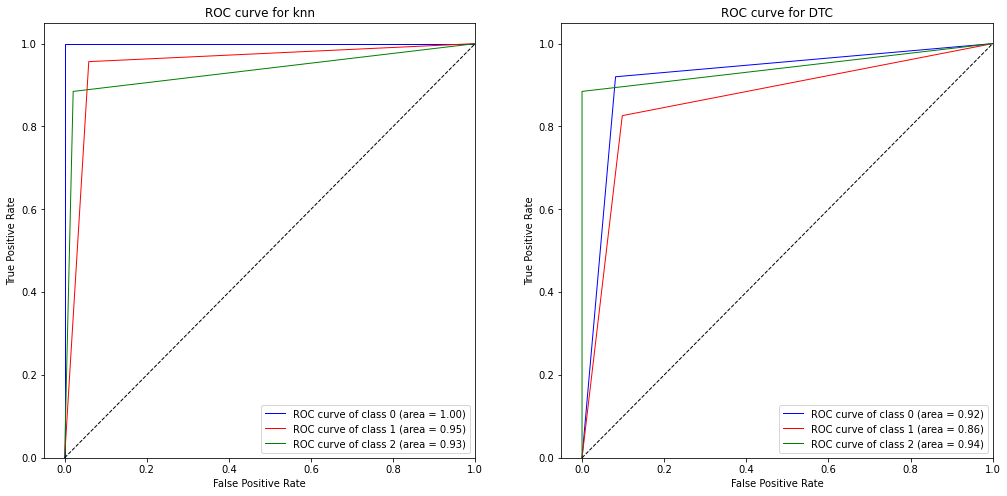

In [16]:

plt.figure(figsize=(10,8))
fig, (ax_0, ax_1) = plt.subplots(nrows=1, ncols=2, figsize=(17, 8))  

predict = knn.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([-0.05, 1.0])
ax_0.set_ylim([0.0, 1.05])
ax_0.set_xlabel('False Positive Rate')
ax_0.set_ylabel('True Positive Rate')
ax_0.set_title('ROC curve for knn')
ax_0.legend(loc="lower right")

predict = dtc.predict(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_1.plot(fpr[i], tpr[i], color=color, lw=1,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([-0.05, 1.0])
ax_1.set_ylim([0.0, 1.05])
ax_1.set_xlabel('False Positive Rate')
ax_1.set_ylabel('True Positive Rate')
ax_1.set_title('ROC curve for DTC')
ax_1.legend(loc="lower right")

plt.show()

# PR-кривая

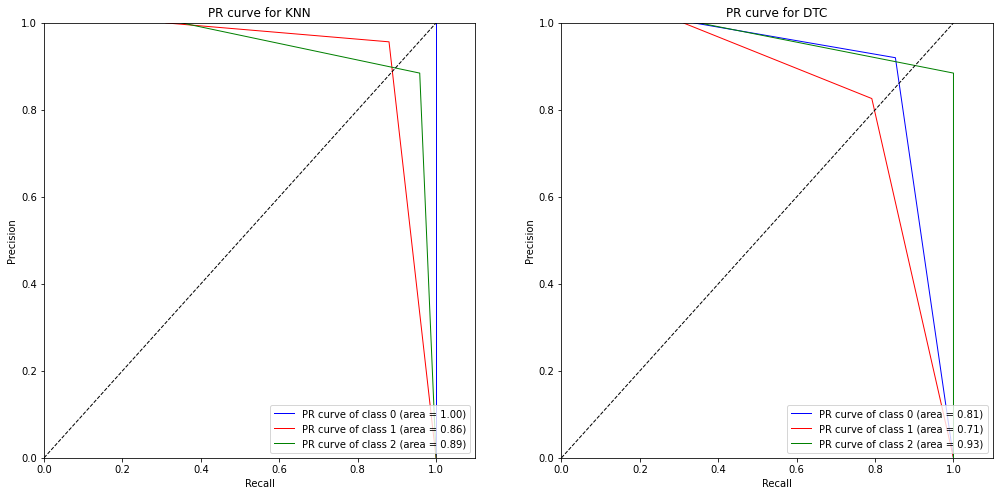

In [17]:
fig, (ax_0, ax_1) = plt.subplots( nrows=1, ncols=2, figsize=(17, 8))  

predict = knn.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_0.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_0.plot([0, 1], [0, 1], 'k--', lw=1)
ax_0.set_xlim([0.0, 1.1])
ax_0.set_ylim([0.0, 1.0])
ax_0.set_xlabel('Recall')
ax_0.set_ylabel('Precision')
ax_0.set_title('PR curve for KNN')
ax_0.legend(loc="lower right")



predict = dtc.predict(X_test)
precision = dict()
recall = dict()
aps = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], predict[:, i])
    aps[i] = average_precision_score(y_test[:, i], predict[:, i])
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    ax_1.plot(precision[i], recall[i], color=color, lw=1,
             label='PR curve of class {0} (area = {1:0.2f})'
             ''.format(i, aps[i]))
ax_1.plot([0, 1], [0, 1], 'k--', lw=1)
ax_1.set_xlim([0.0, 1.1])
ax_1.set_ylim([0.0, 1.0])
ax_1.set_xlabel('Recall')
ax_1.set_ylabel('Precision')
ax_1.set_title('PR curve for DTC')
ax_1.legend(loc="lower right")
plt.show()

## 9) Метод К ближайших сосоедей имеет лучший показатель точности, чем бинарно ерешающее дерево